In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def info(G: nx.Graph):
    # 平均距離 (L)
    average_distance = round(nx.average_shortest_path_length(G), 3)
    print('平均距離 (L): {}'.format(average_distance))

    # 平均クラスター係数 (C)
    average_clustering = round(nx.average_clustering(G), 3)
    print('平均クラスター係数 (C): {}'.format(average_clustering))

    # 次数分布
    degree_list = sorted(dict(G.degree()).values(), reverse=True)
    average_degree = np.mean(degree_list)
    max_degree = max(degree_list)
    n = nx.number_of_nodes(G)
    xs = list(range(1, max_degree + 1))
    ys = [len([degree for degree in degree_list if degree >= x]) / n for x in xs]
    print('平均次数: {}'.format(average_degree))
    
    # グラフ表示
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    nx.draw(G, node_color='#3B60A8', edge_color='#36435E', node_size=100, ax=axes[0])
    axes[1].scatter(xs, ys)
    axes[1].set_title('Frequency of Degree')
    axes[1].set_xlim(1, max_degree + 1)
    axes[1].set_xlabel('Degree')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')

In [3]:
def interaction_graph(G: nx.Graph, hop: int) -> nx.Graph:
    new_graph = nx.Graph()
    new_graph.add_nodes_from(G.nodes)

    for node_id in G.nodes:
        neighbors = [x for x in list(nx.single_source_shortest_path_length(G, node_id, hop)) if x != node_id]
        neighbors = random.sample(neighbors, 3) if len(neighbors) > 3 else neighbors
        edges = [(node_id, x) for x in neighbors]
        new_graph.add_edges_from(edges)

    return new_graph

平均距離 (L): 3.993
平均クラスター係数 (C): 0.029
平均次数: 3.992


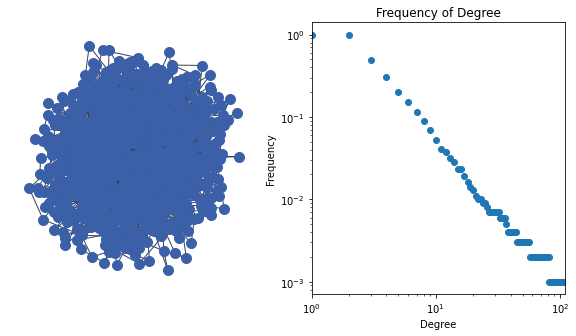

In [4]:
G = nx.barabasi_albert_graph(1000, 2)
info(G)

平均距離 (L): 4.804
平均クラスター係数 (C): 0.013
平均次数: 3.534


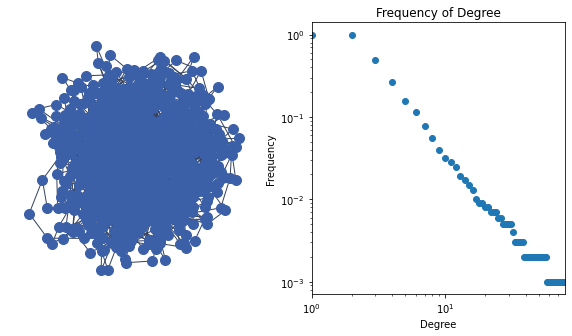

In [5]:
info(interaction_graph(G, 1))

平均距離 (L): 4.124
平均クラスター係数 (C): 0.072
平均次数: 5.742


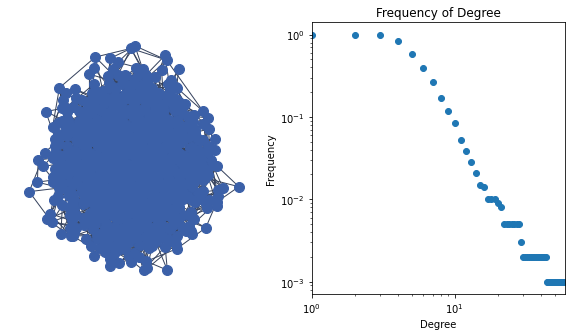

In [6]:
info(interaction_graph(G, 2))

平均距離 (L): 4.01
平均クラスター係数 (C): 0.006
平均次数: 5.964


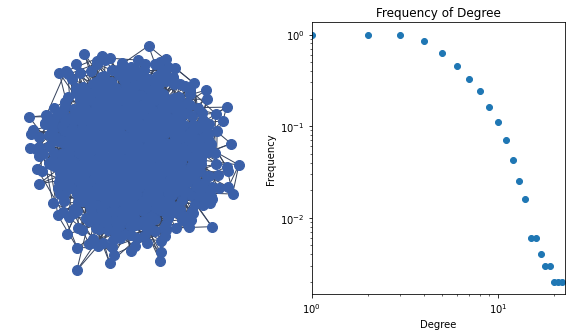

In [7]:
info(interaction_graph(G, 3))

平均距離 (L): 4.073
平均クラスター係数 (C): 0.005
平均次数: 5.996


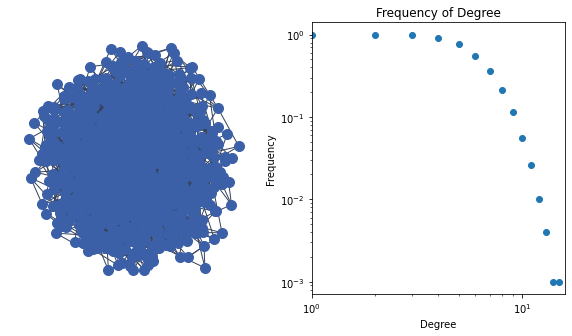

In [8]:
info(interaction_graph(G, 4))

平均距離 (L): 4.109
平均クラスター係数 (C): 0.004
平均次数: 5.996


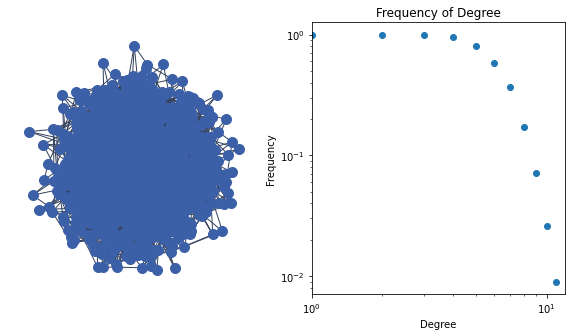

In [9]:
info(interaction_graph(G, 5))

平均距離 (L): 4.102
平均クラスター係数 (C): 0.003
平均次数: 5.992


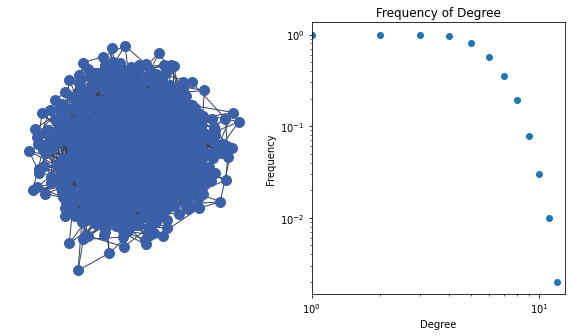

In [10]:
info(interaction_graph(G, 6))